In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df_test = pd.read_csv('bank.csv', sep=';')

## Análise Geral do Dataset

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.shape, df_test.shape

((45211, 17), (4521, 17))

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# para referencias de dataprep
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [9]:
# checando valores faltantes no dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

## Soma de Empréstimos de Habitação e Pessoal por Profissão

In [181]:
df2 = df[['job', 'housing', 'loan']].copy()

In [182]:
from sklearn.preprocessing import LabelEncoder

In [183]:
le = LabelEncoder()
df2.housing = le.fit_transform(df2.housing)
df2.loan = le.fit_transform(df2.loan)

In [184]:
df2['sum_loans'] = df2[['housing', 'loan']].sum(axis=1)
df2.head()

,job,housing,loan,sum_loans
0,management,1,0,1
1,technician,1,0,1
2,entrepreneur,1,1,2
3,blue-collar,1,0,1
4,unknown,0,0,0


In [185]:
(df2.groupby(['job']).sum()['sum_loans']/(2*(df2.groupby(['job']).count()['loan']))).sort_values(ascending=False)

job
blue-collar      0.448623
services         0.433558
entrepreneur     0.411903
admin.           0.403500
technician       0.356983
self-employed    0.314756
management       0.313544
unemployed       0.250192
housemaid        0.221774
retired          0.176678
student          0.139126
unknown          0.052083
dtype: float64

In [195]:
df2[df2['job'] == 'blue-collar'].sum()

job          blue-collarblue-collarblue-collarblue-collarbl...
housing                                                   7048
loan                                                      1684
sum_loans                                                 8732
dtype: object

Logo, o profissional com mais tendência a fazer empréstimo é o ***Blue-Collar (Operário)***, do tipo de ***Habitação***.

## Análise de Empréstimos por Tipo e Profissão

### Credito à Habitação

In [196]:
loan_prof_df = df.groupby(['job', 'housing']).count().unstack()['y']
loan_prof_df = loan_prof_df.div(loan_prof_df.sum(axis=1), axis=0).sort_values(by='yes', ascending=False)
loan_prof_df

housing,no,yes
job,,
blue-collar,0.275791,0.724209
services,0.334136,0.665864
admin.,0.384645,0.615355
entrepreneur,0.415602,0.584398
technician,0.458339,0.541661
management,0.505392,0.494608
self-employed,0.515516,0.484484
unemployed,0.583269,0.416731
housemaid,0.679032,0.320968


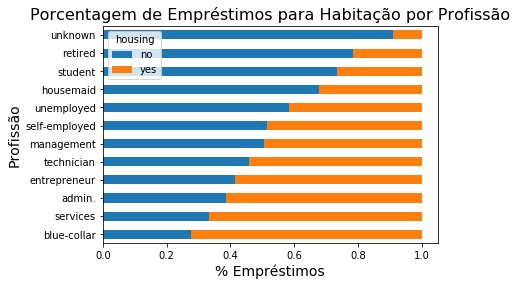

In [197]:
loan_prof_df.plot(kind='barh', stacked=True)
plt.title('Porcentagem de Empréstimos para Habitação por Profissão', fontsize=16)
plt.ylabel('Profissão', fontsize=14)
plt.xlabel('% Empréstimos', fontsize=14)
plt.show()

Logo, o profissional com mais tendência a fazer empréstimos para Habitação é o ***Blue-Collar***

### Crédito Pessoal

In [198]:
loan_prof_df = df.groupby(['job', 'loan']).count().unstack()['y']
loan_prof_df = loan_prof_df.div(loan_prof_df.sum(axis=1), axis=0).sort_values(by='yes', ascending=False)
loan_prof_df

loan,no,yes
job,,
entrepreneur,0.760592,0.239408
services,0.798748,0.201252
admin.,0.808354,0.191646
blue-collar,0.826963,0.173037
technician,0.827695,0.172305
self-employed,0.854972,0.145028
retired,0.863516,0.136484
management,0.867520,0.132480
housemaid,0.877419,0.122581


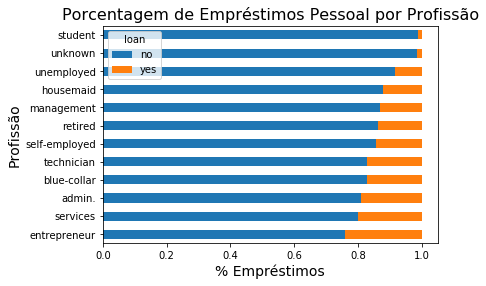

In [200]:
loan_prof_df.plot(kind='barh', stacked=True)
plt.title('Porcentagem de Empréstimos Pessoal por Profissão', fontsize=16)
plt.ylabel('Profissão', fontsize=14)
plt.xlabel('% Empréstimos', fontsize=14)
plt.show()

Apesar do blue-collar ser o profissional com maior tendência a pedir empéstimos no geral, o que mais pesa é o crédito à habitação, pois o ***Empreendedor*** tende a fazer mais empréstimos pessoais.

## Número de contatos e sucesso da campanha

In [324]:
df3 = df[['campaign', 'poutcome', 'y']].copy()

In [325]:
df3.campaign.value_counts()[:10]

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
Name: campaign, dtype: int64

In [326]:
df3.campaign = pd.cut(df3.campaign, [0, 1, 2, 5, 10, 20, 30, 65], labels=['1 Ligação','2 Ligações','2-5 Ligações', '6-10 Ligações', '11-20 Ligações', '21-30 Ligações', '> 30 Ligações '])

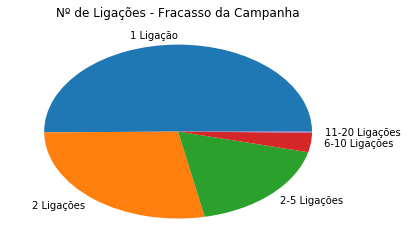

In [340]:
df3.groupby(['campaign', 'poutcome']).count().unstack('poutcome')[('y', 'failure')].plot.pie()
plt.title('Nº de Ligações - Fracasso da Campanha')
plt.ylabel('')
plt.show()

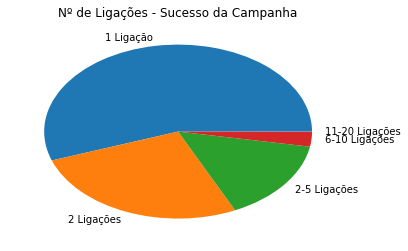

In [341]:
df3.groupby(['campaign', 'poutcome']).count().unstack('poutcome')[('y', 'success')].plot.pie()
plt.title('Nº de Ligações - Sucesso da Campanha')
plt.ylabel('')
plt.show()

Para o sucesso da campanha, vê-se um ligeiro aumento na porcentagem de instâncias com uma só ligação. Juntas, uma e duas ligações representam quase a mesma porcentagem tanto de casos de fracasso quanto de sucesso da campanha. 